BERTELOOT Emile

DE SCHAMPHELEIRE Ben

In [3]:
from google.colab import files
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image

In [13]:
upload = files.upload()

AttributeError: ignored

In [12]:
!ls

images_isar  sample_data


#BE noté : Classification des cibles radar à partir des images ISAR (Radar à synthèse d'ouverture inverse)

## Partie 1: Analyse des données ISAR

### Question 1

#### a)

In [4]:
path = os.path.expanduser('/content/images_isar')
files = glob.glob(path + "/*.bmp") #Get the bmp files of the database

dic = {}
for f in files:
    file_name = f.split('/')[-1]
    file_name_no_extension = file_name.split('.bmp')[0]
    class_picture = file_name_no_extension.split('_')[0]
    number_picture = file_name_no_extension.split('_')[1]
    try:
        dic[class_picture] +=1
    except KeyError:
        dic[class_picture] = 1

There are 5 classes, named:  

In [5]:
print(dic.keys())

dict_keys([])


Each containing the following number of images (respectively):

In [6]:
print(dic.values())

dict_values([])


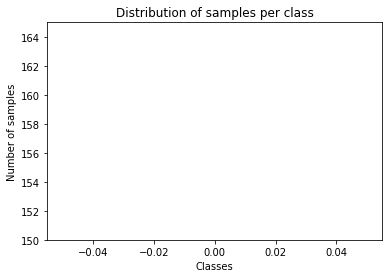

In [7]:
plt.bar( dic.keys(), dic.values() )
plt.title('Distribution of samples per class')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.ylim((150, 165))
plt.show()

We see that the images are distributed uniformly over the different classes

#### b)

In [8]:
img = np.array(Image.open(files[0]))

IndexError: ignored

Size of one image:

In [ ]:
print(img.shape)

with a minimal value of:

In [ ]:
print(np.min(img))

and a maximal value of:

In [ ]:
print(np.max(img))

Thus, every image is composed of 256x256 pixels, each containing one byte of data

#### c)

In [ ]:
x_crop = 50
y_crop = 100
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        file = random.choice(files)
        img = np.array(Image.open(file))
        axs[i,j].imshow(img)
        axs[i,j].plot([x_crop, x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([255 - x_crop, 255 - x_crop], [0, 255], 'r-', lw=2)
        axs[i,j].plot([0, 255], [y_crop, y_crop], 'r-', lw=2)
        axs[i,j].plot([0, 255], [255 - y_crop, 255 - y_crop], 'r-', lw=2)
plt.show()

### Question 2

In [ ]:
def load_bdd():
    cropped_length = (255-2*x_crop)*(255-2*y_crop)
    res = {'data':np.zeros([cropped_length, len(files)]),'classes':[]}
    for i in range(len(files)):
        res['data'][:,i] = np.array( Image.open(files[i]) )[x_crop:255-x_crop, y_crop:255-y_crop].flatten()
        res['classes'].append(files[i].split("/")[-1].split("_")[0])
    return res

data = load_bdd()

print(data["classes"][0])
print(data["data"].shape)